In [1]:
import pandas as pd
import glob
import os
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import matplotlib.pyplot as plt
from gensim.parsing.preprocessing import remove_stopwords,strip_punctuation,preprocess_string,strip_short,stem_text
from gensim import corpora
from gensim.models import LsiModel
from gensim.models.coherencemodel import CoherenceModel

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dirs=["2020-11","2020-12","2021-01","2021-02"]
li = []
for dir in dirs:
  path="/content/drive/My Drive/CS7641/raw_roBERTa/"
  path+=dir
  all_files = glob.glob(os.path.join(path , "*.csv"))
  for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

100%|██████████| 672/672 [00:11<00:00, 57.61it/s] 


In [4]:
data_first_wave = pd.concat(li, axis=0, ignore_index=True)
data_first_wave.head()

,Unnamed: 0,created_at,full_text,sentiment_score
0,0,2020-11-02 02:59:54+00:00,RT positive cues for today \nRIL improvement i...,"[{'label': 'Positive', 'score': 0.893498122692..."
1,1,2020-11-02 02:59:54+00:00,RT My colleagues and I will continue to engage...,"[{'label': 'Positive', 'score': 0.631185948848..."
2,2,2020-11-02 02:59:54+00:00,RT This is rally roulette. Check out this vide...,"[{'label': 'Neutral', 'score': 0.8711994886398..."
3,3,2020-11-02 02:59:55+00:00,cont- analytic jobs and AI can do most of that...,"[{'label': 'Negative', 'score': 0.653407394886..."
4,4,2020-11-02 02:59:55+00:00,"RT Danny, we've never met. I know one thing th...","[{'label': 'Neutral', 'score': 0.5582951307296..."


In [5]:
dirs=["2021-12","2022-01"]
li = []
for dir in dirs:
  path="/content/drive/My Drive/CS7641/raw_roBERTa/"
  path+=dir
  all_files = glob.glob(os.path.join(path , "*.csv"))
  for filename in tqdm(all_files):
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

100%|██████████| 744/744 [00:13<00:00, 55.76it/s] 


In [6]:
data_second_wave = pd.concat(li, axis=0, ignore_index=True)
data_second_wave.tail()

,Unnamed: 0,created_at,full_text,sentiment_score
227628,166,2022-01-08 03:00:01+00:00,We will surely break a million cases in one da...,"[{'label': 'Neutral', 'score': 0.5817304253578..."
227629,167,2022-01-08 03:00:01+00:00,RT Having not gotten covid yet feels like I've...,"[{'label': 'Negative', 'score': 0.645866274833..."
227630,168,2022-01-08 03:00:01+00:00,"RT Because, nearly three years into a pandemic...","[{'label': 'Negative', 'score': 0.825582623481..."
227631,169,2022-01-08 03:00:01+00:00,RT This isn't complicated \nPromote vaccines &...,"[{'label': 'Neutral', 'score': 0.6965311169624..."
227632,170,2022-01-08 03:00:01+00:00,RT Having not gotten covid yet feels like I've...,"[{'label': 'Negative', 'score': 0.645866274833..."


In [7]:
data_first_wave=data_first_wave.drop('Unnamed: 0',axis=1)
data_second_wave=data_second_wave.drop('Unnamed: 0',axis=1)

In [8]:
print(data_first_wave.shape)
data_first_wave = data_first_wave[data_first_wave['full_text'].notna()]
data_first_wave.shape

(433073, 3)


(433068, 3)

In [9]:
print(data_second_wave.shape)
data_second_wave = data_second_wave[data_second_wave['full_text'].notna()]
data_second_wave.shape

(227633, 3)


(227631, 3)

In [10]:
def preprocess(text):
    CUSTOM_FILTERS = [lambda x: x.lower(), 
                                remove_stopwords, 
                                strip_punctuation, 
                                strip_short]
    text = preprocess_string(text, CUSTOM_FILTERS)
    
    return text
 
data_first_wave['clean_text'] = data_first_wave['full_text'].apply(lambda x: preprocess(x))
data_second_wave['clean_text'] = data_second_wave['full_text'].apply(lambda x: preprocess(x))

In [11]:
corpus_first_wave = data_first_wave['clean_text']
lexicon_first_wave = corpora.Dictionary(corpus_first_wave)
bow_first_wave = [lexicon_first_wave.doc2bow(text) for text in corpus_first_wave]

corpus_second_wave = data_second_wave['clean_text']
lexicon_second_wave = corpora.Dictionary(corpus_second_wave)
bow_second_wave = [lexicon_second_wave.doc2bow(text) for text in corpus_second_wave]

In [12]:
for i in range(2,11):
    lsi_first_wave = LsiModel(bow_first_wave, num_topics=i, id2word=lexicon_first_wave)
    coherence_model_first_wave = CoherenceModel(model=lsi_first_wave, texts=data_first_wave['clean_text'], dictionary=lexicon_first_wave, coherence='u_mass')
    coherence_score_first_wave = coherence_model_first_wave.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_first_wave))

Coherence score with 2 clusters: -3.2870343465073013
Coherence score with 3 clusters: -3.434559004795244
Coherence score with 4 clusters: -3.796148193719552
Coherence score with 5 clusters: -3.942289969278746
Coherence score with 6 clusters: -3.9309197257788746
Coherence score with 7 clusters: -4.1261573249860595
Coherence score with 8 clusters: -4.041844856716406
Coherence score with 9 clusters: -4.021777730433535
Coherence score with 10 clusters: -4.146846550169606


In [17]:
lsi_first_wave = LsiModel(bow_first_wave, num_topics=7, id2word=lexicon_first_wave)

In [22]:
text_first_wave=""
for topic_num, words in lsi_first_wave.print_topics(num_words=5):
    t_list=words.split("+")
    t_list=[t[t.index('"')+1:t.rfind('"')] for t in t_list]
    if "https" in t_list:
      t_list.remove('https')
    text_first_wave+=" ".join(t_list)
    text_first_wave+=" "
    print('Words in Topic {}: {}.'.format(topic_num, words))

Words in Topic 0: 0.912*"covid" + 0.143*"https" + 0.116*"vaccine" + 0.111*"people" + 0.107*"pandemic".
Words in Topic 1: 0.756*"pandemic" + -0.304*"covid" + 0.257*"https" + 0.208*"covid19" + 0.188*"people".
Words in Topic 2: -0.553*"pandemic" + 0.387*"covid19" + 0.332*"https" + 0.279*"new" + 0.279*"coronavirus".
Words in Topic 3: 0.543*"amp" + 0.510*"people" + -0.319*"https" + -0.224*"cases" + -0.220*"new".
Words in Topic 4: -0.666*"people" + 0.638*"amp" + -0.157*"coronavirus" + 0.132*"covid19" + -0.118*"cases".
Words in Topic 5: -0.559*"https" + 0.407*"cases" + -0.307*"vaccine" + 0.279*"new" + 0.241*"deaths".
Words in Topic 6: 0.630*"lockdown" + -0.560*"vaccine" + 0.317*"https" + -0.297*"covid19" + -0.157*"coronavirus".


In [29]:
coherence_model_first_wave = CoherenceModel(model=lsi_first_wave, texts=data_first_wave['clean_text'], dictionary=lexicon_first_wave, coherence='u_mass')
coherence_score_first_wave = coherence_model_first_wave.get_coherence()
print('UMass Coherence score with {} clusters: {}'.format(7, coherence_score_first_wave))

coherence_model_first_wave = CoherenceModel(model=lsi_first_wave, texts=data_first_wave['clean_text'], dictionary=lexicon_first_wave, coherence='c_v')
coherence_score_first_wave = coherence_model_first_wave.get_coherence()
print('CV Coherence score with {} clusters: {}'.format(7, coherence_score_first_wave))

coherence_model_first_wave = CoherenceModel(model=lsi_first_wave, texts=data_first_wave['clean_text'], dictionary=lexicon_first_wave, coherence='c_uci')
coherence_score_first_wave = coherence_model_first_wave.get_coherence()
print('UCI Coherence score with {} clusters: {}'.format(7, coherence_score_first_wave))

UMass Coherence score with 7 clusters: -4.128453702988826
CV Coherence score with 7 clusters: 0.346167002032519
UCI Coherence score with 7 clusters: -0.980536487713432


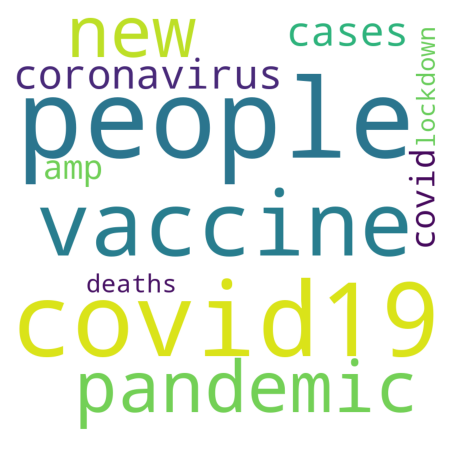

In [23]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(text_first_wave)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [24]:
for i in range(2,11):
    lsi_second_wave = LsiModel(bow_second_wave, num_topics=i, id2word=lexicon_second_wave)
    coherence_model_second_wave = CoherenceModel(model=lsi_second_wave, texts=data_second_wave['clean_text'], dictionary=lexicon_second_wave, coherence='u_mass')
    coherence_score_second_wave = coherence_model_second_wave.get_coherence()
    print('Coherence score with {} clusters: {}'.format(i, coherence_score_second_wave))

Coherence score with 2 clusters: -3.3472324853347706
Coherence score with 3 clusters: -3.83131430150859
Coherence score with 4 clusters: -3.6689716603777023
Coherence score with 5 clusters: -3.670585707475999
Coherence score with 6 clusters: -4.069665043721224
Coherence score with 7 clusters: -3.652333119135299
Coherence score with 8 clusters: -3.975539852197712
Coherence score with 9 clusters: -3.935631932823048
Coherence score with 10 clusters: -3.960455108861005


In [25]:
lsi_second_wave = LsiModel(bow_second_wave, num_topics=6, id2word=lexicon_second_wave)

In [26]:
text_second_wave=""
for topic_num, words in lsi_second_wave.print_topics(num_words=5):
    t_list=words.split("+")
    t_list=[t[t.index('"')+1:t.rfind('"')] for t in t_list]
    if "https" in t_list:
      t_list.remove('https')
    text_second_wave+=" ".join(t_list)
    text_second_wave+=" "
    print('Words in {}: {}.'.format(topic_num, words))

Words in 0: 0.924*"covid" + 0.117*"https" + 0.115*"people" + 0.100*"vaccine" + 0.087*"new".
Words in 1: 0.525*"vaccine" + 0.364*"omicron" + -0.320*"covid" + 0.292*"pandemic" + 0.291*"https".
Words in 2: 0.747*"vaccine" + -0.345*"omicron" + -0.285*"pandemic" + -0.251*"https" + -0.236*"new".
Words in 3: 0.606*"pandemic" + 0.471*"people" + -0.411*"omicron" + -0.201*"cases" + -0.188*"new".
Words in 4: -0.686*"people" + 0.419*"pandemic" + 0.365*"https" + -0.358*"omicron" + 0.167*"vaccine".
Words in 5: 0.617*"new" + -0.444*"omicron" + 0.379*"cases" + -0.373*"amp" + 0.233*"people".


In [30]:
coherence_model_second_wave = CoherenceModel(model=lsi_second_wave, texts=data_second_wave['clean_text'], dictionary=lexicon_second_wave, coherence='u_mass')
coherence_score_second_wave = coherence_model_second_wave.get_coherence()
print('UMass Coherence score with {} clusters: {}'.format(6, coherence_score_second_wave))

coherence_model_second_wave = CoherenceModel(model=lsi_second_wave, texts=data_second_wave['clean_text'], dictionary=lexicon_second_wave, coherence='c_v')
coherence_score_second_wave = coherence_model_second_wave.get_coherence()
print('CV Coherence score with {} clusters: {}'.format(6, coherence_score_second_wave))

coherence_model_second_wave = CoherenceModel(model=lsi_second_wave, texts=data_second_wave['clean_text'], dictionary=lexicon_second_wave, coherence='c_uci')
coherence_score_second_wave = coherence_model_second_wave.get_coherence()
print('UCI Coherence score with {} clusters: {}'.format(6, coherence_score_second_wave))

UMass Coherence score with 6 clusters: -4.054893606606916
CV Coherence score with 6 clusters: 0.28256268581541744
UCI Coherence score with 6 clusters: -0.4512431051477839


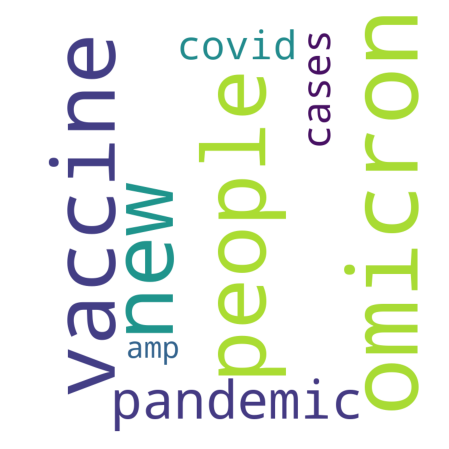

In [27]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',min_font_size = 10).generate(text_second_wave)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()